## **Context**
This car sales dataset includes information about different cars. 
This dataset is being taken from the Analytixlabs for the purpose of analysis.

## **Objectives**

   * What is the distribution of sales?
   * Which manufacturers and models have the highest and lowest sales?
   * What is the distribution of car price? Are there any outliers in the price distribution?
   * Is there a correlation between the initial price and resale value?
   * What is the distribution of horsepower?
   * Are there any relationships between engine size, horsepower, and price?
   


## **Import Libraries and Dataset**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

sales = pd.read_csv('../input/car-sales/Car_sales.csv')

## **Data Exploration**

In [34]:
# The first 5 rows  of the DataFrame
sales.head(20)
# print(sales['Year_resale_value'].median())
# print(sales.loc[sales['Year_resale_value'].isnull()][['Manufacturer','Model','Year_resale_value']])

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [35]:
# Sales DataFrame's shape
print("Shape: %d rows and %d columns" % sales.shape)

Shape: 157 rows and 16 columns


In [36]:
# Rename 'year_resale_value' column
sales.rename(columns={'__year_resale_value':'Year_resale_value'}, inplace=True)

# Sales DataFrame's columns name
print("Columns: ")
for column in sales.columns:
    print("-",column)

Columns: 
- Manufacturer
- Model
- Sales_in_thousands
- Year_resale_value
- Vehicle_type
- Price_in_thousands
- Engine_size
- Horsepower
- Wheelbase
- Width
- Length
- Curb_weight
- Fuel_capacity
- Fuel_efficiency
- Latest_Launch
- Power_perf_factor


In [37]:
# Sales DataFrame's data types
print(sales.dtypes)

Manufacturer           object
Model                  object
Sales_in_thousands    float64
Year_resale_value     float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Latest_Launch          object
Power_perf_factor     float64
dtype: object


In [38]:
# Check for missing values
print(sales.isnull().sum())

# Create function to check percentage of missing values
def check_missing_value():
    missing_value_percentage = (sales.isnull().sum().sum()/sales.shape[0]) * 100
    print(f"Total missing values {round(missing_value_percentage,2)}%")

check_missing_value()

Manufacturer           0
Model                  0
Sales_in_thousands     0
Year_resale_value     36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64
Total missing values 32.48%


In [39]:
# Fill missing values
sales['Year_resale_value'].fillna(int(sales['Year_resale_value'].mean()), inplace=True)
sales.fillna(method='ffill', inplace=True)

check_missing_value()

Total missing values 0.0%


In [40]:
# Dataset Statistical Summary
sales.describe()

,Sales_in_thousands,Year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,18.056242,27.403229,3.063694,186.375796,107.522293,71.170701,187.473248,3.383032,17.945860,23.847134,77.289533
std,68.029422,10.045330,14.259785,1.041889,56.771067,7.629469,3.450553,13.486843,0.628442,3.876185,4.242891,25.081561
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,17.710000,23.400000,3.000000,180.000000,107.000000,70.600000,188.000000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.500000,196.200000,3.821000,19.500000,26.000000,90.211700
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


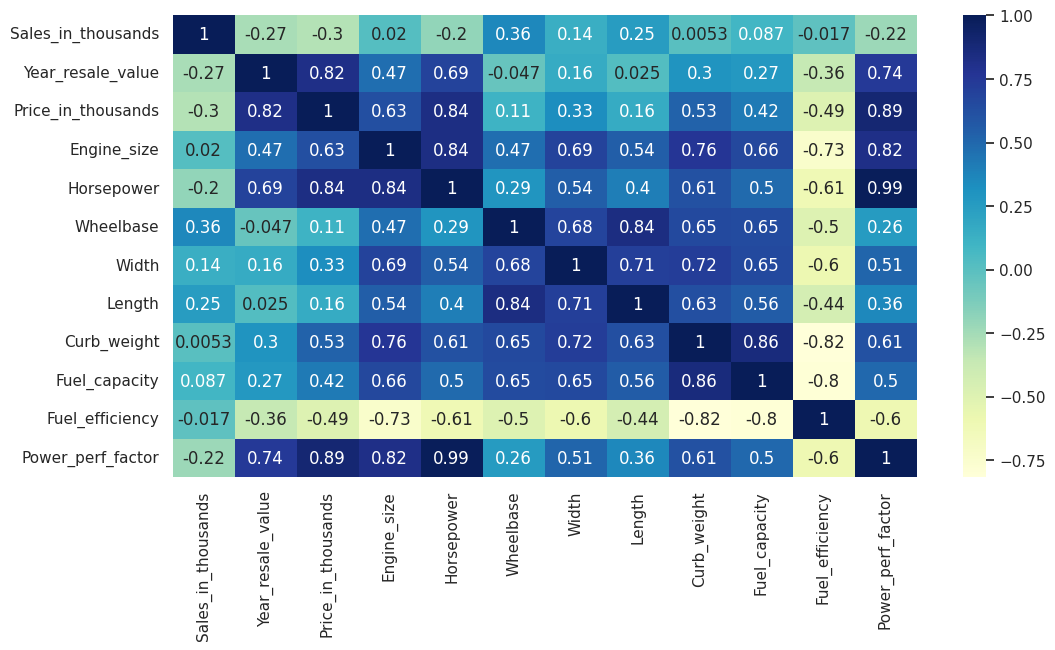

In [41]:
# Features Correlation
# print(sales.corr(numeric_only=True))

# plotting correlation to heatmap
plt.figure(figsize=(12,6))
sns.heatmap(sales.corr(numeric_only=True), cmap="YlGnBu", annot=True);

## **Analysis & Visualizations**

   ### **What is the distribution of sales?**

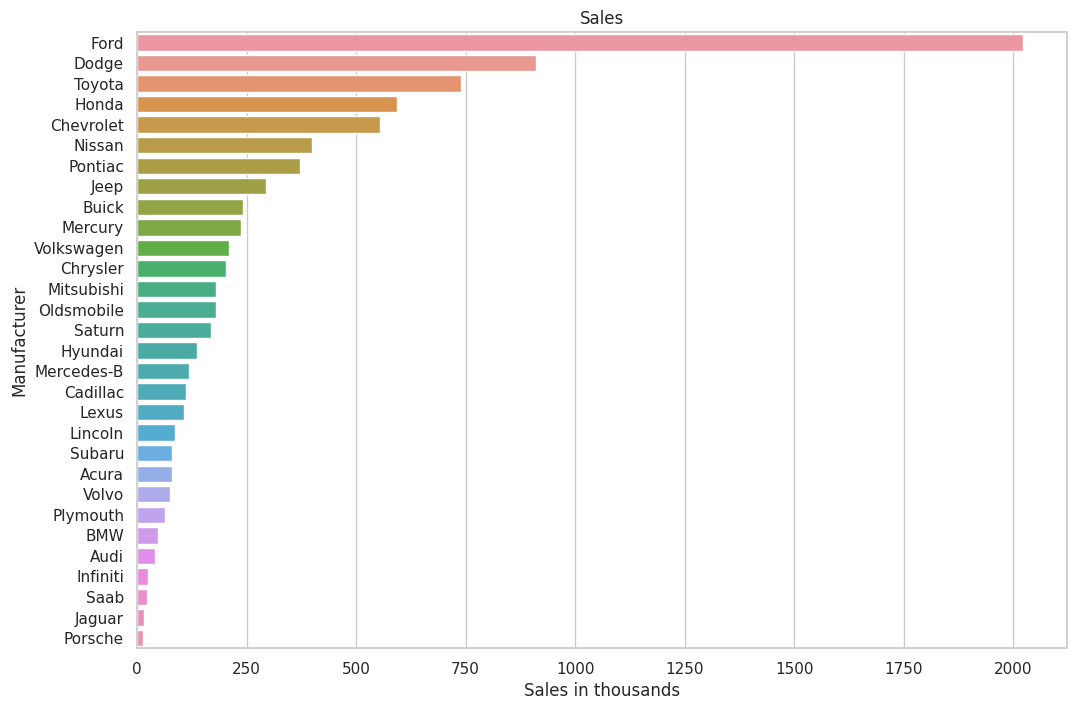

In [42]:
data = sales.groupby('Manufacturer')['Sales_in_thousands'].sum().reset_index()
data_sorted = data.sort_values(by='Sales_in_thousands', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Sales_in_thousands', y='Manufacturer', data=data_sorted)
plt.title("Sales")
plt.xlabel('Sales in thousands');

   ### **Which manufacturers and models have the highest and lowest sales?**

In [43]:
data = sales.groupby('Model')[['Manufacturer','Sales_in_thousands']].sum().reset_index()
data_sorted = data.sort_values(by='Sales_in_thousands', ascending=False)
data_sorted

,Model,Manufacturer,Sales_in_thousands
63,F-Series,Ford,540.561
62,Explorer,Ford,276.747
31,Camry,Toyota,247.994
145,Taurus,Ford,245.815
12,Accord,Honda,230.902
...,...,...,...
34,Carrera Coupe,Porsche,1.280
49,Cutlass,Oldsmobile,1.112
26,CL500,Mercedes-B,0.954
151,Viper,Dodge,0.916


   ### **What is the distribution of car price? Are there any outliers in the price distribution?**

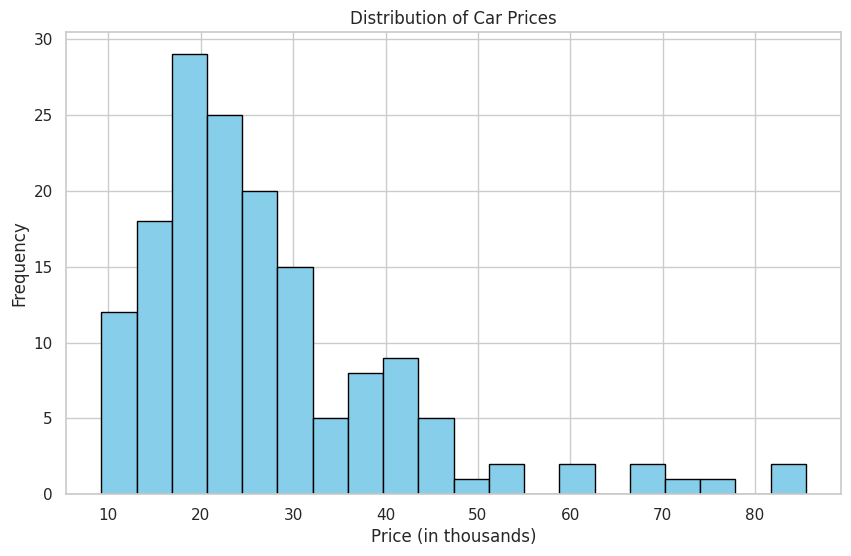

In [44]:
prices = sales['Price_in_thousands']

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

6      62.000
39     69.725
73     54.005
74     60.105
94     69.700
95     82.600
99     85.500
125    71.020
126    74.970
Name: Price_in_thousands, dtype: float64


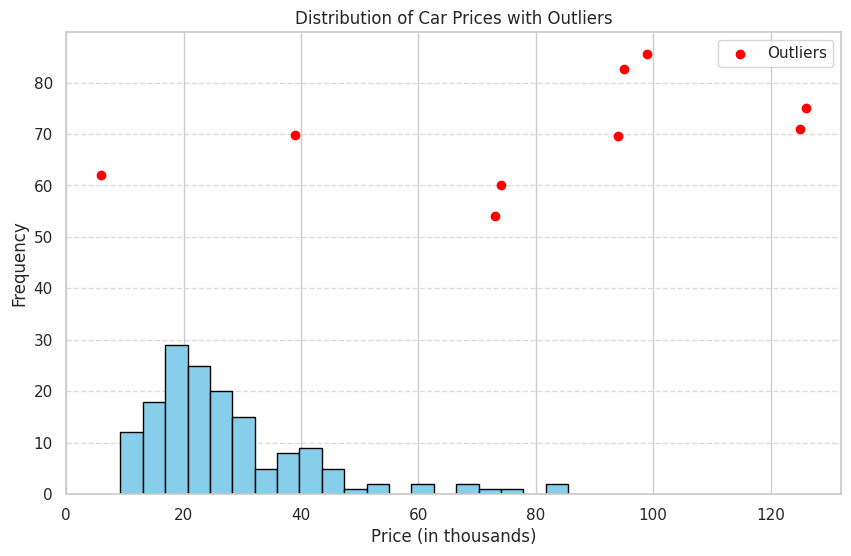

In [45]:
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]
print(outliers)

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title('Distribution of Car Prices with Outliers')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   ### **Is there a correlation between the initial price and resale value?**

In [46]:
correlation_coefficient = sales['Price_in_thousands'].corr(sales['Year_resale_value'])
print('Correlation between the initial price and resale value: ' + str(round(correlation_coefficient*100,2))+'%')

Correlation between the initial price and resale value: 82.19%


   ### **What is the distribution of horsepower?**

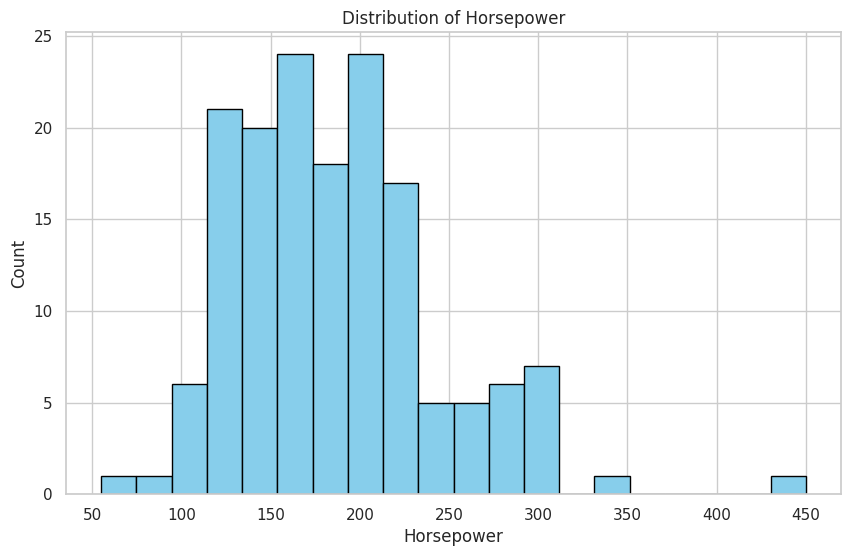

In [47]:
# data = sales.groupby('Horsepower')['Horsepower'].value_counts().reset_index()
data = sales['Horsepower']

plt.figure(figsize=(10,6))
# sns.barplot(x='Horsepower', y='count', data=data)
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Horsepower");
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()


   ### **Are there any relationships between engine size, horsepower, and price?**

                    Engine_size  Horsepower  Price_in_thousands
Engine_size            1.000000    0.836330            0.626703
Horsepower             0.836330    1.000000            0.835501
Price_in_thousands     0.626703    0.835501            1.000000


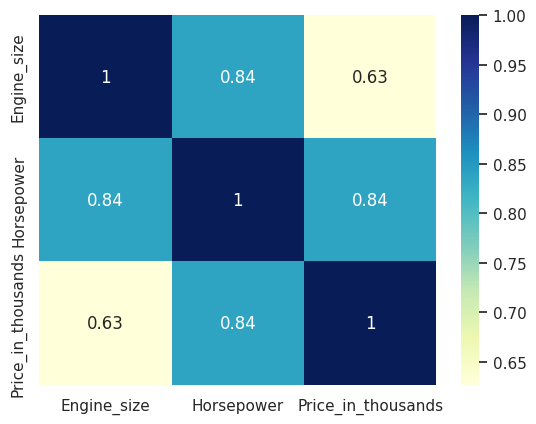

In [48]:
sns.heatmap(sales[['Engine_size','Horsepower','Price_in_thousands']].corr(), annot=True, cmap="YlGnBu");
print(sales[['Engine_size','Horsepower','Price_in_thousands']].corr())